### IMPORTING IMPORTANT LIBRARIES AND MODULES

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

- Reading Data

In [35]:
df = pd.read_csv(r"C:\Users\kanis\Desktop\Cancer-Predictor\artifacts\raw.csv")

- Dealing with Categorical Data

In [ ]:
df = df.replace({"M":1,"B":0})

- Splitting the Dataset

In [ ]:
corr_coef = df.corr()["diagnosis"]
optimal_features = corr_coef[abs(corr_coef)>0.5]
optimal_features 

In [38]:
optimal_features = ["diagnosis","radius_mean","perimeter_mean","area_mean","compactness_mean","concavity_mean","concave points_mean","radius_se","perimeter_se" ,"area_se","radius_worst","perimeter_worst","area_worst","compactness_worst","concavity_worst","concave points_worst"]         
data =df[optimal_features]

In [39]:
x = df.drop("diagnosis",axis=1)
y = df["diagnosis"]

- Getting Training and Testing Datasets

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

- Scaling the Numerical Data

In [41]:
ss = StandardScaler()
ss.fit_transform(x_train)
ss.transform(x_test)

array([[-0.24295555, -0.46649743, -0.13728933, ..., -0.19435087,
         0.17275669,  0.20372995],
       [-0.23712621,  1.36536344,  0.49866473, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [-0.24355432,  0.38006578,  0.06921974, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.23693649, -0.73547237, -0.99852603, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [-0.23694721,  0.02898271,  2.0334026 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 0.42868759,  1.87216885,  2.80077153, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

- Defining Models and Parameters to use

In [49]:
models = {"LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()
          }
parameters = {
          "LogisticRegression": { "C":[0.1,1,10],
                                 "penalty":["l1","l2"],
                                 "solver":["liblinear","saga"]},
          
          "RandomForestClassifier": {"n_estimators": [50, 100, 200],
                                     "max_depth": [None, 10, 20],
                                     "min_samples_split": [2, 5, 10]}
          }

- Applying HyperParameter Tuning

In [50]:
best_models = {}
for model_name in models:

    clf = GridSearchCV(models[model_name],parameters[model_name],cv=5,n_jobs=-1)
    clf.fit(x_train,y_train)
    best_models[model_name] = clf.best_estimator_
    print(f"Best parameters for {model_name}: {clf.best_params_}")
    print(f"Best cross-validated score for {model_name}: {clf.best_score_}","\n")

Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated score for LogisticRegression: 0.9626373626373628 

Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated score for RandomForestClassifier: 0.9648351648351647 



From the above observation we can choose our best model in its best parameters' state as RandomForestClassifier


- Training the model on complete Training Dataset

In [51]:
best_model = RandomForestClassifier()
best_model.fit(x_train,y_train)

RandomForestClassifier()

- Checking for the Score of Model

In [52]:
best_model.score(x_test,y_test)

0.9649122807017544

- Checking out different metrics for the Trained Model

In [59]:
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [71]:
print("accuracy of the Model: ",{accuracy})
print("precision of the Model: ",{precision})
print("recall of the Model: ",{recall})
print("f1 of the Model: ",{f1})

accuracy of the Model:  {0.9649122807017544}
precision of the Model:  {np.float64(0.975609756097561)}
recall of the Model:  {np.float64(0.9302325581395349)}
f1 of the Model:  {np.float64(0.9523809523809523)}


- Understanding the model's performance by Confusion Matrix

In [67]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[70,  1],
       [ 3, 40]])

Text(50.722222222222214, 0.5, 'Predicted')

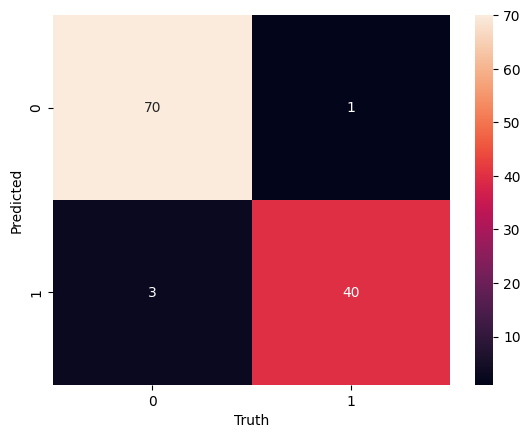

In [68]:
sns.heatmap(cm , annot=True )
plt.xlabel("Truth")
plt.ylabel("Predicted")

We have successfully prepared a classifier model with an accuracy of approximately 96 percent.